In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

dataset_path = 'dataset'
user_data = pd.read_csv(dataset_path + '/user.csv')
user_data

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,5.0,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,64.0,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,0.0,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,0.0,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,7.0,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,1.0,2015-01-06 00:31:31,7,0,0,NaN,None,0,...,0,0,0,0,0,0,0,0,0,0
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1.0,2016-06-14 07:20:52,0,0,0,NaN,None,0,...,0,0,0,0,0,0,0,0,0,0
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,1.0,2017-02-04 15:31:58,1,1,0,NaN,None,0,...,0,0,0,0,0,0,0,0,0,0
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,1.0,2011-01-14 00:29:08,0,0,0,NaN,None,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from datetime import datetime
df = pd.DataFrame()
df['friends'] = user_data['friends'].map(lambda x: len(x.split()))
df['yelping_since'] = user_data['yelping_since'].map(lambda x: datetime.fromisoformat(x).year)
df['yelping_since'].value_counts()

2015    247850
2014    233465
2016    217620
2013    209762
2012    195955
2011    176435
2017    151024
2018    133568
2010    109054
2019    104655
2009     64911
2020     47444
2021     40485
2008     31097
2007     15340
2006      5423
2022      2782
2005       937
2004        90
Name: yelping_since, dtype: int64

In [14]:
df

,friends,yelping_since
0,14995,2007
1,4646,2009
2,381,2008
3,131,2005
4,27,2007
...,...,...
1987892,1,2015
1987893,1,2016
1987894,1,2017
1987895,1,2011


In [36]:
friends_per_init_year = df.groupby('yelping_since')['friends'].sum()
df2 = pd.DataFrame()
df2['amigos'] = friends_per_init_year
df2['año'] = friends_per_init_year.index

df2

,amigos,año
yelping_since,,
2004,27962,2004
2005,183651,2005
2006,735597,2006
2007,1850580,2007
2008,3206311,2008
2009,4902434,2009
2010,7819623,2010
2011,10169453,2011
2012,9227728,2012


<AxesSubplot:xlabel='año'>

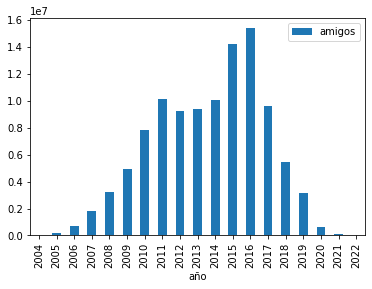

In [39]:
df2.plot(x='año', y='amigos', kind = 'bar')